<a href="https://colab.research.google.com/github/devulapallia1/CNN/blob/main/592ML_tf_keras_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
import numpy as np
import matplotlib.pyplot as plt # for plots
import seaborn as sns # for plots


TensorFlow version: 2.15.0


In [ ]:
# get the mnist dataset, where each data item is a handwritten image.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

flagPrepared = False # flag used to modify dataset only once

11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)
(10000, 28, 28)
label is  7
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   

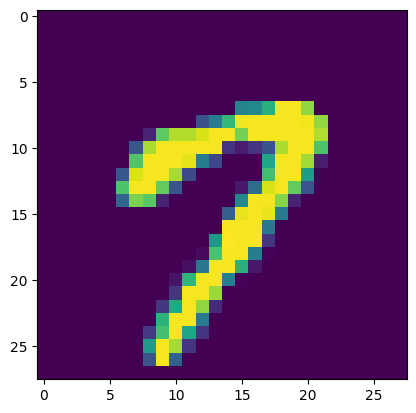

In [ ]:
# understand the dataset:
print(x_train.shape)  # (60000, 28, 28): 60K training images, each image is a 28 by 28 matrix
print(x_test.shape)   # (10000, 28, 28)
plt.imshow(x_train[15])  # show the first image in a plot, which is a 5.
print("label is ", y_train[15]) # its label
print(x_train[0])  # let's see the 28*28 matrix. Each number is in [0, 255]
# sns.countplot(y_train) # plot a figure to visualize y's (labels)

In [ ]:
# Prepare the training/testing dataset for our keras CNN model:

if flagPrepared == False:
  x_train = x_train / 255.0  # values will be in [0, 1]
  x_test = x_test / 255.0
  x_train = np.expand_dims(x_train, axis=-1) # expand dimensions so each image has shape (28, 28, 1). More about image shape at www.tensorflow.org/tutorials/images/classification
  x_test = np.expand_dims(x_test, axis=-1)
  flagPrepared = True

print(x_train.shape)
#print(x_train[0])

(60000, 28, 28, 1)


In [ ]:
# define a CNN model:

# Step 1: define a keras sequential model with Conv2D, MaxPool, Flatten, Dense:

# using keras functional API,  start by creating an input node:
inputs = tf.keras.layers.Input(shape=(28, 28, 1))
c = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu')(inputs) # calling a Conv2D layer on inputs
m = tf.keras.layers.MaxPool2D((2, 2), (2, 2))(c)
f = tf.keras.layers.Flatten()(m)  # convert matrix into a 1d array
outputs = tf.keras.layers.Dense(10, activation='softmax')(f)

model = tf.keras.models.Model(inputs, outputs)

# step 2: Compile the model: compile sets the training parameters
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# step 3: training:
model.fit(x_train, y_train, epochs=2) # 1 epoch --> accuracy 93%, 10 epochs --> 99.4%!

model.summary()


In [ ]:
# after training

print(x_test.shape)

predicted = model(x_test[0:1, :]) # the first testing data, at index 0. The input to model() should be a batch, so we use slice on rows 0:1 to get row 0.
print(predicted) # the output is a vector of 10 values
print(tf.math.argmax(predicted[0]).numpy())  # the index of the maximum value is the predicted label for this data item
print("true y:", y_test[0])

predicted = model(x_test[5:6, :]) # the testing data item at index 5
print(predicted)
print(tf.math.argmax(predicted[0]).numpy())
print("true y:", y_test[5])


In [ ]:
# another way to use keras's functional API:

# using keras functional API
cnnModel = tf.keras.Sequential()
cnnModel.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(28, 28, 1)))
cnnModel.add(tf.keras.layers.MaxPool2D((2, 2), (2, 2)))
cnnModel.add(tf.keras.layers.Flatten())  # convert matrix into a 1d array
cnnModel.add(tf.keras.layers.Dense(10, activation='softmax'))

# step 2: Compile the model: compile sets the training parameters
cnnModel.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  #'sparse_categorical_crossentropy',
              metrics=['accuracy'])

# step 3: training:
cnnModel.fit(x_train, y_train, epochs=2) # 1 epoch --> accuracy 93%, 10 epochs --> 99.4%!

cnnModel.summary()

In [ ]:
# after training:

predicted = cnnModel(x_test[0:1, :]) # the first testing data, at index 0. The input to model() should be a batch, so we use slice on rows 0:1 to get row 0.
print(predicted) # the output is a vector of 10 values
print(tf.math.argmax(predicted[0]).numpy())  # the index of the maximum value is the predicted label for this data item
print("true y:", y_test[0])

predicted = cnnModel(x_test[5:6, :]) # the testing data item at index 5
print(predicted)
print(tf.math.argmax(predicted[0]).numpy())
print("true y:", y_test[5])

tf.Tensor(
[[3.2692049e-10 3.3090440e-12 1.9587827e-05 2.1604101e-05 1.2878797e-11
  1.5838419e-10 1.0017139e-13 9.9995863e-01 1.3425807e-07 5.5752462e-08]], shape=(1, 10), dtype=float32)
7
true y: 7
tf.Tensor(
[[1.4246100e-05 9.9752325e-01 6.1743646e-07 3.2240092e-07 6.3600586e-05
  1.9178294e-06 9.9814585e-08 7.6883543e-06 2.3842831e-03 3.9361144e-06]], shape=(1, 10), dtype=float32)
1
true y: 1
